# MNIST

In [58]:
import os
cwd = os.getcwd()

os.chdir('/home/facu/Dropbox/Repositorios/d-distance/')
from ddistance import *

os.chdir('/home/facu/Dropbox/Repositorios/d-distance/MNIST/')

from auxiliar_functions import *
from data_load import *
from heatplot import *

import sklearn.manifold as mani

## MNIST dataset

In [36]:
data_set = 'MNIST'

dic = import_data_set (data = 'MNIST', 
                       size = 1000,                             # for MINST is the number of each cluster
                       random_sample = True ,
                       ploteo = False, 
                       save = False, 
                       which_digits = [3,5,8],    # just for MNIST
                       numero_de_componentes = 30,              # <---- Number of components of PCA
                       metrica = 'euclidean' )

data = dic["data"]
distances_matrix_MNIST = dic['distance']
labels_MNIST = dic['labels']
datacruda_MNIST = dic["data_cruda"]
dataPCA_MNIST = dic["data_proyectada"]

Extracting Data sets/MNIST_data/train-images-idx3-ubyte.gz
Extracting Data sets/MNIST_data/train-labels-idx1-ubyte.gz
Extracting Data sets/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting Data sets/MNIST_data/t10k-labels-idx1-ubyte.gz


/home/facu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


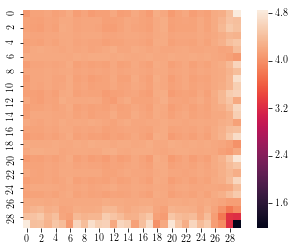

In [63]:
draw_heatplot(distances_matrix_MNIST, 30, order=labels_MNIST, cbar=True)

## Principal Components Analysis

Comparamos como se ven las imágenes originales de MNIST (28 x 28 = 784 dimensiones) comparadas con las imágenes trasnformadas luego de realizar una proyección sobre sólo 30 componentes principales.

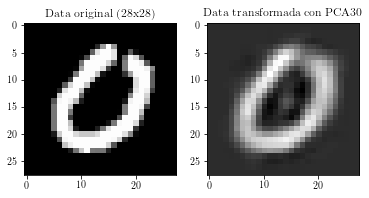

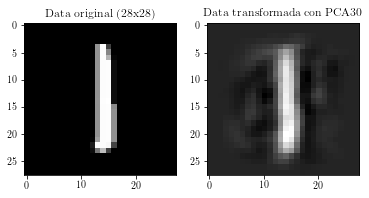

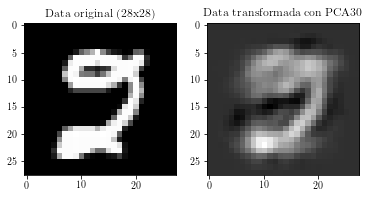

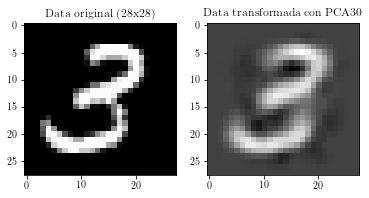

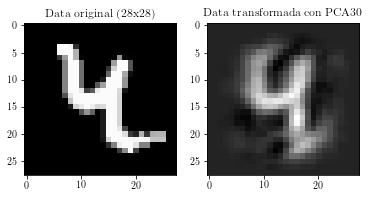

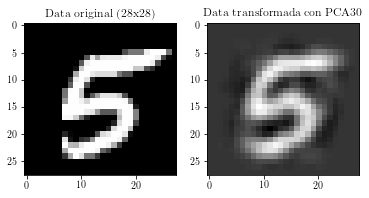

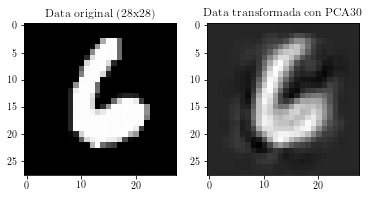

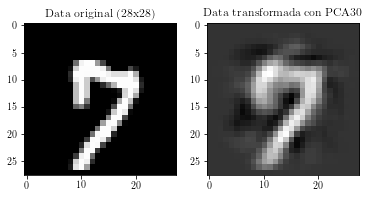

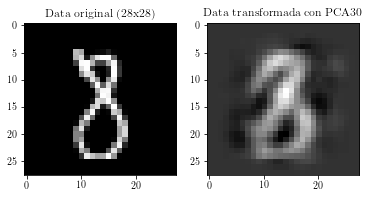

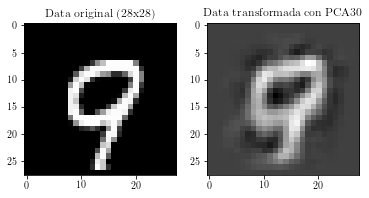

In [5]:
i, lab = 0, 0
while lab < 10:
    if labels_MNIST[i] == lab:
        plt.close()
        fix, (ax1, ax2) = plt.subplots(1,2)
        ax1.imshow(datacruda_MNIST[i], cmap='gray') ; ax1.set_title('Data original (28x28)') 
        ax2.imshow(dataPCA_MNIST[i], cmap='gray')   ; ax2.set_title('Data transformada con PCA30')
        plt.show()
        lab += 1
    i += 1

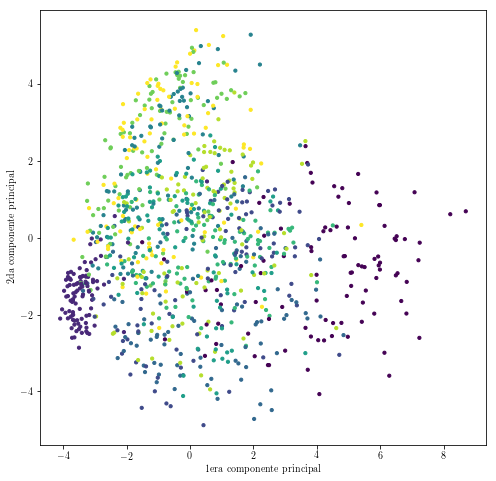

In [6]:
plt.close()
plt.figure(figsize=(8,8))
plt.scatter(data[:,0], data[:,1], c=labels_MNIST, s=10)
plt.xlabel('1era componente principal')
plt.ylabel('2da componente principal')
#plt.savefig('MNIST_1_PCA.png', dpi=200, format='png')
plt.show()

## Multidimnesional Scaling (MDS)

In [7]:
MDS = mani.MDS(n_components = 2, 
               metric = True, 
               n_init = 4, 
               max_iter = 500, 
               verbose = 0, 
               eps = 0.001, 
               n_jobs = -1, 
               random_state = None, 
               dissimilarity = 'precomputed')

In [8]:
pos_MDS = MDS.fit(distances_matrix_MNIST).embedding_

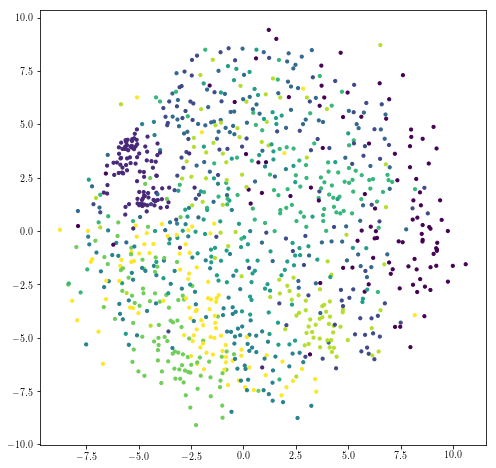

In [9]:
plt.close()
plt.figure(figsize=(8,8))
plt.scatter(pos_MDS[:,0], pos_MDS[:,1], c=labels_MNIST, s=10)
plt.show()

## Isomap

In [17]:
Isomap = mani.Isomap(n_neighbors = 5, 
                     n_components = 2,
                     eigen_solver = 'auto', 
                     tol = 0, 
                     max_iter = None, 
                     path_method = 'auto', 
                     neighbors_algorithm = 'auto', 
                     n_jobs = 1)

In [18]:
pos_Isomap = Isomap.fit(data).embedding_

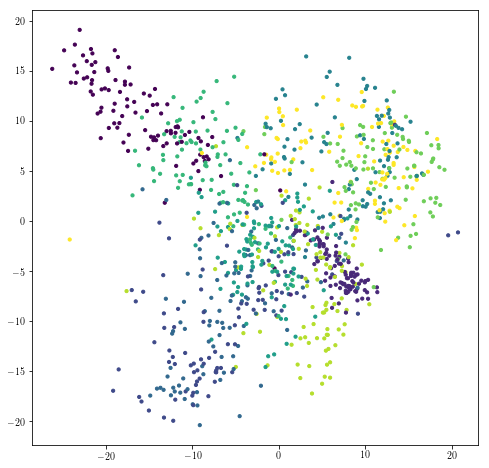

In [19]:
plt.close()
plt.figure(figsize=(8,8))
plt.scatter(pos_Isomap[:,0], pos_Isomap[:,1], c=labels_MNIST, s=10)
#plt.title('MNIST (N=10000) con Isomap')
#plt.savefig('MNIST_3_Isomap.png', dpi=200, format='png')
plt.show()

## t-SNE

In [40]:
TSNE = mani.TSNE(n_components = 2, 
                 perplexity = 30.0, 
                 early_exaggeration = 12.0, 
                 learning_rate = 200.0, 
                 n_iter = 1000, 
                 n_iter_without_progress = 300, 
                 min_grad_norm = 1e-07, 
                 metric = 'precomputed', 
                 init = 'random', 
                 verbose = 0, 
                 random_state = None, 
                 method = 'barnes_hut', 
                 angle = 0.5)

In [41]:
pos_TSNE = TSNE.fit(distances_matrix_MNIST).embedding_

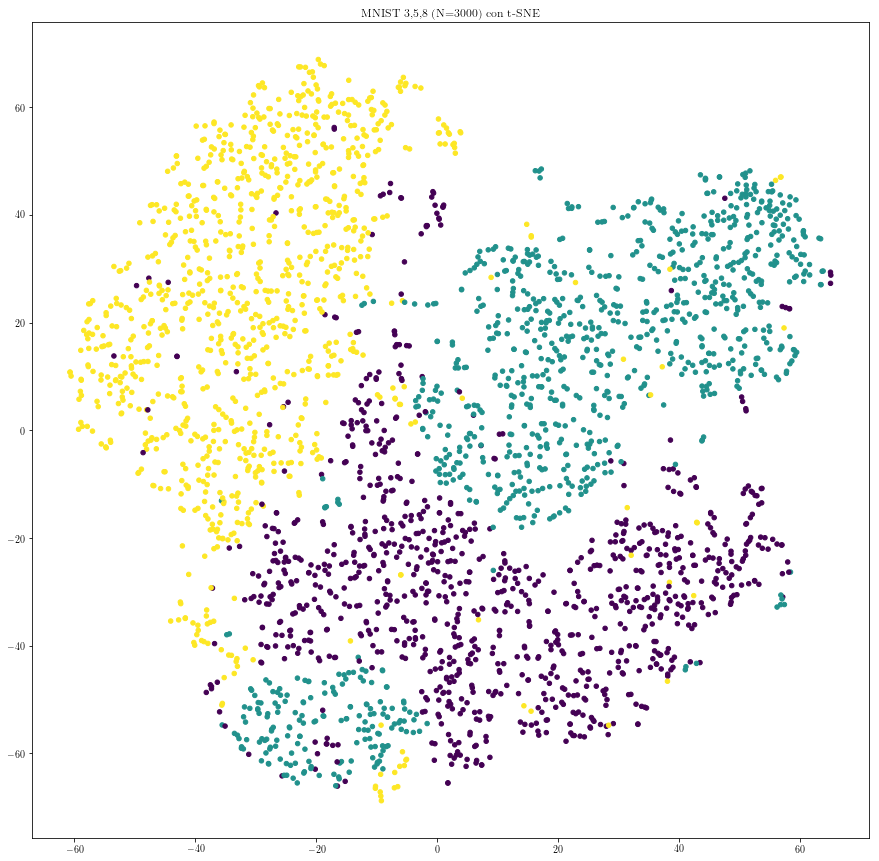

In [48]:
plt.close()
plt.figure(figsize=(15,15))
plt.scatter(pos_TSNE[:,0], pos_TSNE[:,1], c=labels_MNIST, s=20)
#plt.title('MNIST 3,5,8 (N=3000) con t-SNE')
#plt.savefig('MNIST_tSNE.svg', format='svg')
plt.show()

# Fermat + t-SNE

In [70]:
Fermat_distance = d_distance(distance_matrix = distances_matrix_MNIST, 
                             d_param = 6 , 
                             dimension = 2, 
                             k_nn = 100, 
                             indices_to_do="all")[0]

In [71]:
pos_TSNE_Fermat = TSNE.fit(Fermat_distance).embedding_

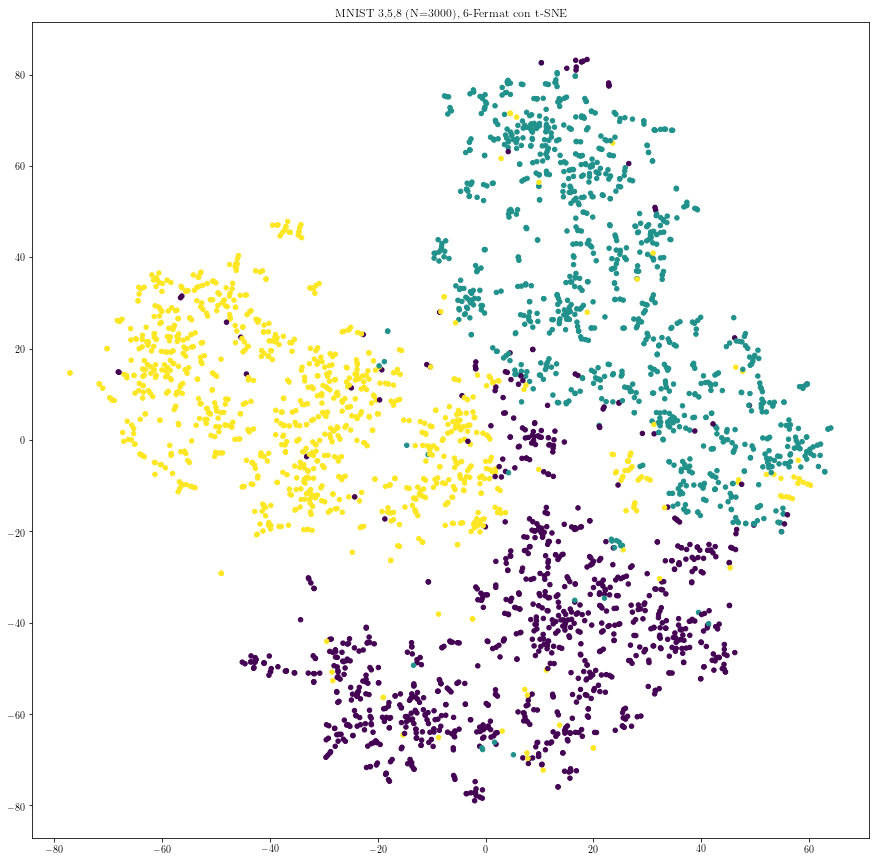

In [73]:
plt.close()
plt.figure(figsize=(15,15))
plt.scatter(pos_TSNE_Fermat[:,0], pos_TSNE_Fermat[:,1], c=labels_MNIST, s=20)
plt.title('MNIST 3,5,8 (N=3000), 6-Fermat con t-SNE')
plt.savefig('MNIST_Fermat6.svg', format='svg')
plt.show()